# PRACTICA HECHA POR JUSTIN ZAMBRANO Y JEREMY DELGADO

Importaciones necesarias: 

In [1]:
import pandas as pd
import numpy as np

### 1. PREPROCESAMIENTO (Fase KDD)

Se lee los datos utilizados para esta prática.

In [2]:
df = pd.read_csv('student_performance_dirty.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Notes
0,7.0,99,Yes,9.0,1,91.0,excellent
1,4.0,82,No,4.0,2,65.0,review
2,8.0,51,Yes,7.0,2,45.0,review
3,5.0,52,Yes,5.0,2,36.0,excellent
4,7.0,75,No,8.0,5,66.0,review
...,...,...,...,...,...,...,...
10000,5.0,69,No,8.0,2,51.0,excellent
10001,2.0,46,Yes,4.0,8,20.0,review
10002,7.0,56,Yes,7.0,5,46.0,excellent
10003,NaN,42,Yes,8.0,5,28.0,review


Ver valores faltantes

In [3]:
df.isna().sum()

Hours Studied                       1032
Previous Scores                        0
Extracurricular Activities             0
Sleep Hours                          496
Sample Question Papers Practiced       0
Performance Index                      0
Notes                                  0
dtype: int64

Como se puede ver hay datos faltantes en la columna de Hours Studied y en la columna de Sleep Hours

Imputación por mediana en columnas numéricas con NaN. Se decidio esto para evitar algun tipo de sesgo por valores extremos y conservar el tamaño de la muestra.

In [4]:
for col in ["Hours Studied", "Sleep Hours"]:
    mediana = df[col].median()
    df[col] = df[col].fillna(mediana)

Como se ve se escogió usar la mediana de cada fila, tanto como las horas de estudio como las horas de sueño, ya que al encontrarse valores nulos ahí, se llego a la conclusión de que representar esos huecos con la mediana sería lo mejor, para erradicar o controlar los valores extremos

In [5]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
Notes                               0
dtype: int64

Ver valores duplicados:

In [6]:
df.duplicated().sum()

np.int64(51)

In [7]:
df[df.duplicated(subset=["Hours Studied", "Previous Scores", "Sleep Hours", "Performance Index"])]


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Notes
183,9.0,77,Yes,9.0,1,74.0,excellent
365,6.0,77,No,6.0,4,66.0,excellent
428,5.0,64,Yes,6.0,7,49.0,review
472,5.0,40,Yes,7.0,8,26.0,review
510,7.0,75,No,8.0,6,66.0,review
...,...,...,...,...,...,...,...
10000,5.0,69,No,8.0,2,51.0,excellent
10001,2.0,46,Yes,4.0,8,20.0,review
10002,7.0,56,Yes,7.0,5,46.0,excellent
10003,5.0,42,Yes,8.0,5,28.0,review


Segun se observó no hay valores duplicados exactos como tal, son parciales mostrando algunas similitudes en los datos de estudio de cada estudiante. Por ello se toma la desicion de dejarlos como están

#### Tipos de datos

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10005 entries, 0 to 10004
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10005 non-null  float64
 1   Previous Scores                   10005 non-null  int64  
 2   Extracurricular Activities        10005 non-null  object 
 3   Sleep Hours                       10005 non-null  float64
 4   Sample Question Papers Practiced  10005 non-null  int64  
 5   Performance Index                 10005 non-null  float64
 6   Notes                             10005 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 547.3+ KB


Se revisaron los tipos de valores de cada columna, para llegar a un consenso de que tipo de datos se tendrá y que tipos de datos se usarán para comparaciones y analisis

In [9]:
print(df["Extracurricular Activities"].unique())
print(df["Notes"].unique())


['Yes' 'No']
['excellent' 'review']


In [10]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].str.strip().str.capitalize()
df["Notes"] = df["Notes"].str.strip().str.lower()


In [11]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].map({"Yes": 1, "No": 0})
df["Notes"] = df["Notes"].map({"excellent": 1, "review": 0})


Se comprobó que las variables numéricas (Hours Studied, Sleep Hours, Previous Scores, Sample Question Papers Practiced, Performance Index) presentaran tipos numéricos válidos (float o int).

Las variables categóricas (Extracurricular Activities, Notes) se normalizaron para corregir posibles inconsistencias en mayúsculas o espacios y luego se codificaron numéricamente (Yes=1, No=0; excellent=1, review=0).

Detección y tratamiento de outliers

In [12]:
df["Sleep Hours"] = df["Sleep Hours"].clip(lower=0, upper=14)

df["Hours Studied"] = df["Hours Studied"].clip(lower=0, upper=12)


Se recortaron valores extremos en Sleep Hours (>14 horas) y Hours Studied (>12 horas). Esto reduce el ruido y evita que unos pocos valores anómalos dominen la formación de clusters.

### Selección de variables para clusterizar

In [13]:
features = [
    "Hours Studied",
    "Sleep Hours",
    "Sample Question Papers Practiced",
    "Extracurricular Activities",
    "Previous Scores",
    "Performance Index"
]

X = df[features].copy()


Estandarización / Normalización 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
coords_2d = pca.fit_transform(X_scaled)

explained_var = pca.explained_variance_ratio_.sum()
print("Varianza explicada por las 2 componentes:", explained_var)


Varianza explicada por las 2 componentes: 0.5014148237257801


Se aplicó PCA para proyectar los datos a 2 dimensiones

#### ANÁLISIS EXPLORATORIO (EDA)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

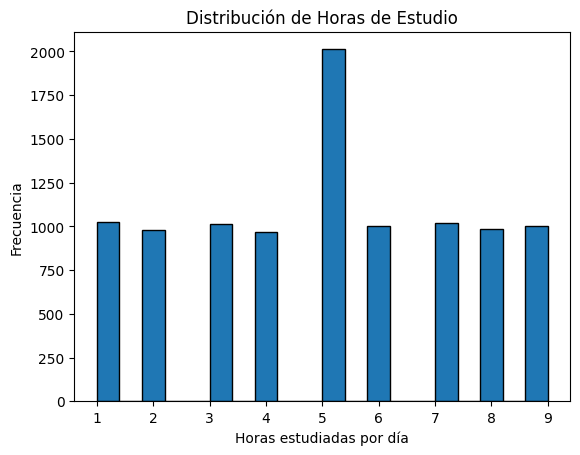

In [ ]:
# Histograma de horas de estudio
plt.figure()
plt.hist(df["Hours Studied"], bins=20, edgecolor='k')
plt.title("Distribución de Horas de Estudio")
plt.xlabel("Horas estudiadas por día")
plt.ylabel("Frecuencia")
plt.show()

El histograma de horas de estudio muestra una distribución relativamente uniforme entre 1 y 9 horas, con una moda en 5 horas. Esto indica que los estudiantes tienden a mantener un hábito de estudio moderado. No se detectan valores atípicos ni concentraciones extremas

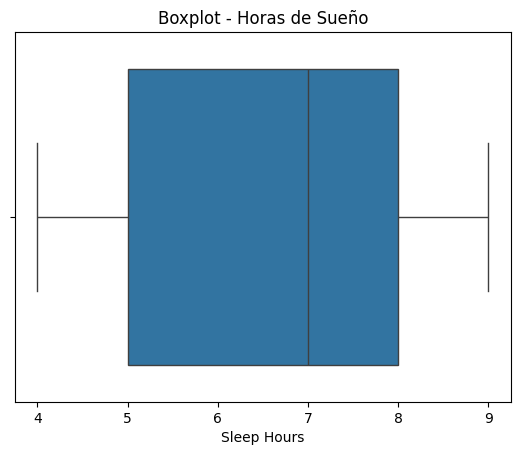

In [ ]:
# Boxplot de horas de sueño
plt.figure()
sns.boxplot(x=df["Sleep Hours"])
plt.title("Boxplot - Horas de Sueño")
plt.show()

El boxplot de horas de sueño muestra una distribución centrada entre 6 y 8 horas, sin valores atípicos. Esto sugiere que la mayoría de los estudiantes mantiene un patrón de descanso regular, por lo que esta variable podría tener una influencia limitada en la diferenciación de clusters.

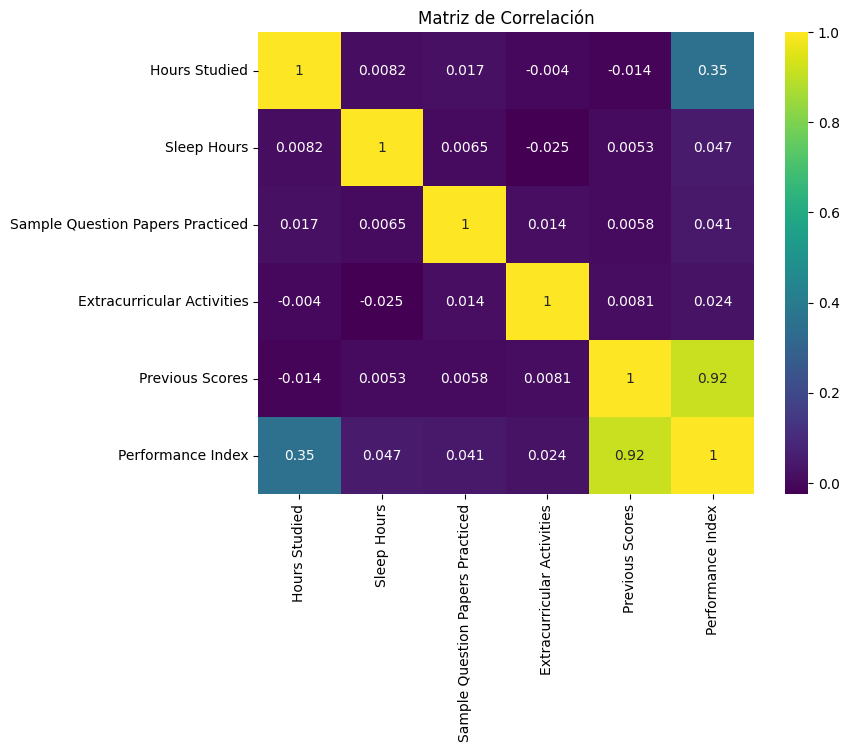

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[features].corr(), annot=True, cmap="viridis")
plt.title("Matriz de Correlación")
plt.show()

La matriz de correlación evidencia una relación positiva muy alta (0.92) entre el rendimiento previo y el actual, lo cual sugiere consistencia en el desempeño de los estudiantes.
También se observa una correlación moderada (0.35) entre horas de estudio y rendimiento, indicando que el esfuerzo académico influye parcialment

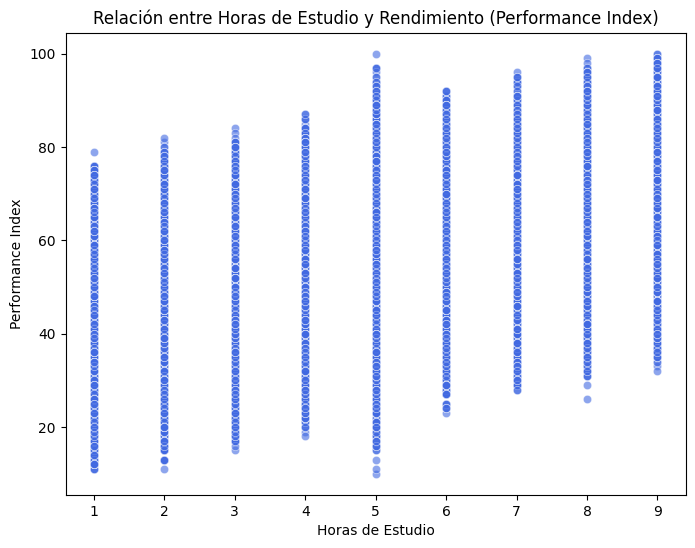

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x="Hours Studied", y="Performance Index", data=df, color='royalblue', alpha=0.6)
plt.title("Relación entre Horas de Estudio y Rendimiento (Performance Index)")
plt.xlabel("Horas de Estudio")
plt.ylabel("Performance Index")
plt.show()

Se observa una relación positiva entre las horas de estudio y el rendimiento académico.
Los estudiantes que estudian entre 6 y 9 horas suelen obtener índices de desempeño más altos.
Sin embargo, la dispersión de los puntos indica que las horas de estudio por sí solas
no explican completamente el rendimiento, lo cual respalda el uso de clustering
para identificar patrones combinados con otras variables.

#### CLUSTERING NO SUPERVISADO

##### K-Means

k=2 -> Silueta=0.2154
k=3 -> Silueta=0.1888
k=4 -> Silueta=0.1940
k=5 -> Silueta=0.1829
k=6 -> Silueta=0.1837
k=7 -> Silueta=0.1814
k=8 -> Silueta=0.1835
k=9 -> Silueta=0.1839
Mejor k según silueta: 2 Silueta: 0.21537891512022012


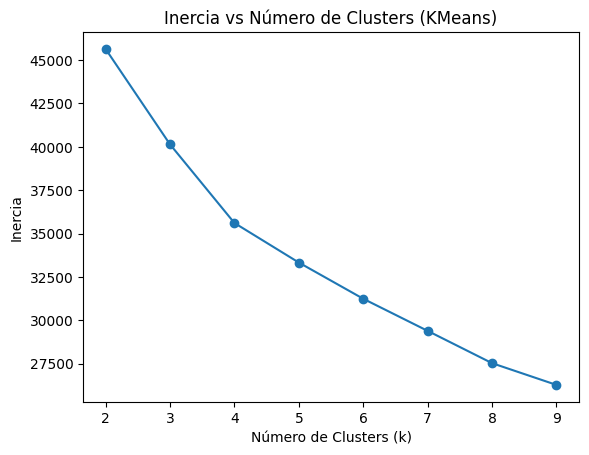

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
silhouettes = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_score = silhouette_score(X_scaled, labels)
    silhouettes.append(sil_score)
    print(f"k={k} -> Silueta={sil_score:.4f}")

# Elegimos el k que maximiza silueta
best_k = K_range[silhouettes.index(max(silhouettes))]
print("Mejor k según silueta:", best_k, "Silueta:", max(silhouettes))

plt.figure()
plt.plot(K_range, inertias, marker='o')
plt.title("Inercia vs Número de Clusters (KMeans)")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia")
plt.show()


In [ ]:
k_final = best_k  
kmeans_final = KMeans(n_clusters=k_final, init="k-means++", n_init=10, random_state=42)
df["Cluster_KMeans"] = kmeans_final.fit_predict(X_scaled)


In [ ]:
centers = pd.DataFrame(
    scaler.inverse_transform(kmeans_final.cluster_centers_), 
    columns=features
)
centers["Cluster"] = range(k_final)
centers

,Hours Studied,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities,Previous Scores,Performance Index,Cluster
0,5.322855,6.600081,4.672683,0.495234,84.358345,71.520990,0
1,4.681514,6.506110,4.510051,0.494482,54.937328,39.370122,1


Cluster 0: Este grupo representa a los estudiantes de alto rendimiento académico.
Son disciplinados, con hábitos de estudio moderadamente altos y buen descanso.
Su constancia en ejercicios y buenas calificaciones previas se reflejan en su alto desempeño actual.

Cluster 1: Este grupo agrupa a los estudiantes de rendimiento bajo o medio-bajo.
Aunque descansan igual y practican una cantidad similar de ejercicios, su menor tiempo de estudio y sus calificaciones previas más bajas parecen influir en su bajo rendimiento actua

### Clustering Jerárquico

HC k=2 -> Silueta=0.5984
HC k=3 -> Silueta=0.1773
HC k=4 -> Silueta=0.0907
HC k=5 -> Silueta=0.0782
HC k=6 -> Silueta=0.0698
HC k=7 -> Silueta=0.0768
HC k=8 -> Silueta=0.0723
HC k=9 -> Silueta=0.0774


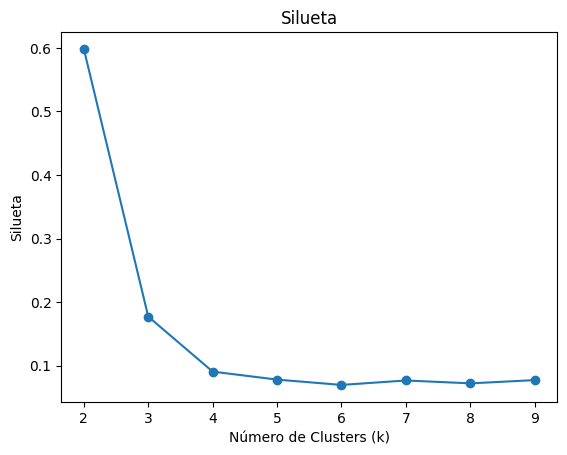

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

sil_scores_hier = []
for k in range(2, 10):
    hc = AgglomerativeClustering(n_clusters=k, linkage='complete')
    labels_hc = hc.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels_hc)
    sil_scores_hier.append((k, sil))
    print(f"HC k={k} -> Silueta={sil:.4f}")


plt.figure()
plt.plot(*zip(*sil_scores_hier), marker='o')
plt.title("Silueta")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Silueta")
plt.show()

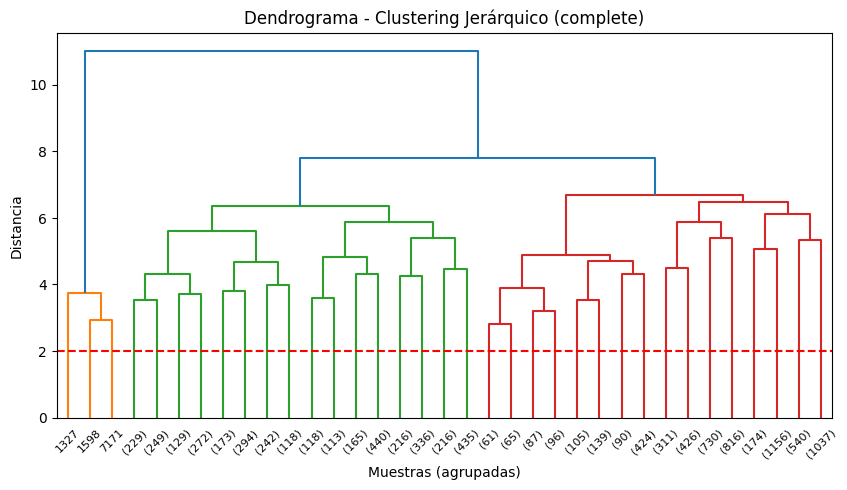

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

Z = linkage(X_scaled, method='complete')

plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Dendrograma - Clustering Jerárquico (complete)")
plt.axhline(y=2, color='r', linestyle='--')
plt.xlabel("Muestras (agrupadas)")
plt.ylabel("Distancia")
plt.show()


El dendrograma muestra la estructura jerárquica del agrupamiento utilizando el método de enlace Complete.
Se observa una separación clara en dos grandes ramas antes de la fusión final (a una distancia aproximada de 10–11), lo que indica la presencia de dos clusters bien diferenciados.

Cortar el dendrograma a esa altura permite dividir el conjunto de estudiantes en dos grupos principales: uno con mayor rendimiento y otro con rendimiento más bajo, resultado que coincide con los obtenidos mediante el algoritmo K-Means.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

linkages = ['ward', 'single', 'complete']
results = {}

for link in linkages:
    hc = AgglomerativeClustering(n_clusters=2, linkage=link)
    labels = hc.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    results[link] = sil
    print(f"Enlace: {link} -> Silueta: {sil:.4f}")


Enlace: ward -> Silueta: 0.1813
Enlace: single -> Silueta: 0.5984
Enlace: complete -> Silueta: 0.5984


El coeficiente de silueta fue 0.21 para K-Means y 0.58 para el método jerárquico (Complete).
La diferencia se debe a que K-Means forma grupos esféricos, mientras que el jerárquico identifica mejor estructuras irregulares.
Por ello, el clustering jerárquico ofrece una mejor separación y representa de forma más realista los patrones del dataset.

## Conclusiones


### Interpretación de los clusters

Gracias al analisis se pudo observar dos grupos principales (Cluster 0 y Cluster 1)
El cluster 0 representa el grupo 1 donde estarían los estudiantes con un rendimiento mas alto, este grupo se caracteriza por dedicar mas horas al estudio y matener un equilibrio con sus horas de sueño, estos tambien practican con mas frecuencia ejercicios academicos y tienen unas notas previas elevadas, y esto se ve reflejado en su desempeño actual
En cambio el cluster 1, representa el grupo 2 donde se ve todo lo contrario. Este grupo dedica menos tiempo al estudio y presenta un redimiento previo bajo en comparacion al anterior grupo. Aunque su tiempo de descanso y pariticipacion extracurricular son similares, se ve una menor consistencia academica.

### Coherencia con el contexto del dataset

Si se mira el contexto educativo, los grupos encontrados (2) tienen sentido.
los estudiantes que dedican más tiempo al estudio y mantienen un historial académico sólido presentan un mejor rendimiento global.
Las variables de sueño y actividades extracurriculares influyen en menor medida, lo cual concuerda con la realidad académica donde el desempeño depende principalmente de la dedicación y constancia en el estudio.

El hecho de que K-Means y el clustering jerárquico coincidieran en k=2 respalda la estabilidad del patrón detectado, aunque con diferencias en la claridad de los límites (jerárquico con mejor separación).

### Limitaciones y posibles mejoras

El coeficiente de silueta bajo en K-Means (0.21) indica que los grupos no están completamente separados, lo que sugiere que las características del dataset reflejan transiciones graduales más que divisiones rígidas.

Podría incorporarse un mayor número de variables (por ejemplo, motivación, asistencia o tipo de materia) para obtener clusters más representativos.

Sería útil probar otros algoritmos no supervisados como DBSCAN u OPTICS, que pueden capturar estructuras no esféricas y mejorar la calidad de la agrupación.

También se podría aplicar una reducción de dimensionalidad con PCA para visualizar mejor la separación entre los grupos y eliminar ruido.